Analisis Perbandingan Algoritma Logistic Regression dan Random Forest untuk Klasifikasi jenis serangan cyber

import library awal

In [1]:
import pandas as pd

setting columns name untuk dataset cyberattack

In [2]:
columns = ["duration", "protocoltype", "service", "flag", "srcbytes", "dstbytes", "land", "wrongfragment",
           "urgent", "hot", "numfailedlogins", "loggedin", "numcompromised", "rootshell", "suattempted",
           "numroot", "numfilecreations", "numshells", "numaccessfiles", "numoutboundcmds", "ishostlogin",
           "isguestlogin", "count", "srvcount", "serrorrate", "srvserrorrate", "rerrorrate", "srvrerrorrate",
           "samesrvrate", "diffsrvrate", "srvdiffhostrate", "dsthostcount", "dsthostsrvcount",
           "dsthostsamesrvrate", "dsthostdiffsrvrate", "dsthostsamesrcportrate", "dsthostsrvdiffhostrate",
           "dsthostserrorrate", "dsthostsrvserrorrate", "dsthostrerrorrate", "dsthostsrvrerror_rate", "labels"]

Pemanggilan dataset dan pengecekan data

In [3]:
data = pd.read_csv('kddcup.data_10_percent',names=columns)
data.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerror_rate,labels
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
data.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerror_rate', 'labels'],
      dtype='object')

In [5]:
data.shape

(494021, 42)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                494021 non-null  int64  
 1   protocoltype            494021 non-null  object 
 2   service                 494021 non-null  object 
 3   flag                    494021 non-null  object 
 4   srcbytes                494021 non-null  int64  
 5   dstbytes                494021 non-null  int64  
 6   land                    494021 non-null  int64  
 7   wrongfragment           494021 non-null  int64  
 8   urgent                  494021 non-null  int64  
 9   hot                     494021 non-null  int64  
 10  numfailedlogins         494021 non-null  int64  
 11  loggedin                494021 non-null  int64  
 12  numcompromised          494021 non-null  int64  
 13  rootshell               494021 non-null  int64  
 14  suattempted         

In [69]:
data.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

text cleaning

In [7]:
pd.unique(data.labels)

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

Menghilangkan titik(.) pada setiap akhiran data labels

In [8]:
def remove_dot(label):
    """ Remove dot from labels """
    return label.replace(".", "")


data["labels"] = data["labels"].apply(lambda label: remove_dot(label))
print(pd.unique(data["labels"]))

['normal' 'buffer_overflow' 'loadmodule' 'perl' 'neptune' 'smurf'
 'guess_passwd' 'pod' 'teardrop' 'portsweep' 'ipsweep' 'land' 'ftp_write'
 'back' 'imap' 'satan' 'phf' 'nmap' 'multihop' 'warezmaster' 'warezclient'
 'spy' 'rootkit']


Pengelompokan categori cyberattack manual

In [9]:
attack_families = {
    "back": "dos",
    "buffer_overflow": "u2r",
    "ftp_write": "r2l",
    "guess_passwd": "r2l",
    "imap": "r2l",
    "ipsweep": "probe",
    "land": "dos",
    "loadmodule": "u2r",
    "multihop": "r2l",
    "neptune": "dos",
    "nmap": "probe",
    "perl": "u2r",
    "phf": "r2l",
    "pod": "dos",
    "portsweep": "probe",
    "rootkit": "u2r",
    "satan": "probe",
    "smurf": "dos",
    "spy": "r2l",
    "teardrop": "dos",
    "warezclient": "r2l",
    "warezmaster": "r2l",
    "normal": "normal",
}


def map_attacks_to_families(attack):
    """ Map attack to it's family """
    return attack_families[attack]


data["labels"] = data["labels"].apply(lambda attack: map_attacks_to_families(attack))
print(pd.unique(data["labels"]))

['normal' 'u2r' 'dos' 'r2l' 'probe']


pengecekan jumlah masing-masing labels yang sudah di kelompokan

In [10]:
data.groupby("labels")["labels"].count().sort_values(ascending=False)

labels
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: labels, dtype: int64

visualisasi data

Text(0, 0.5, 'Count')

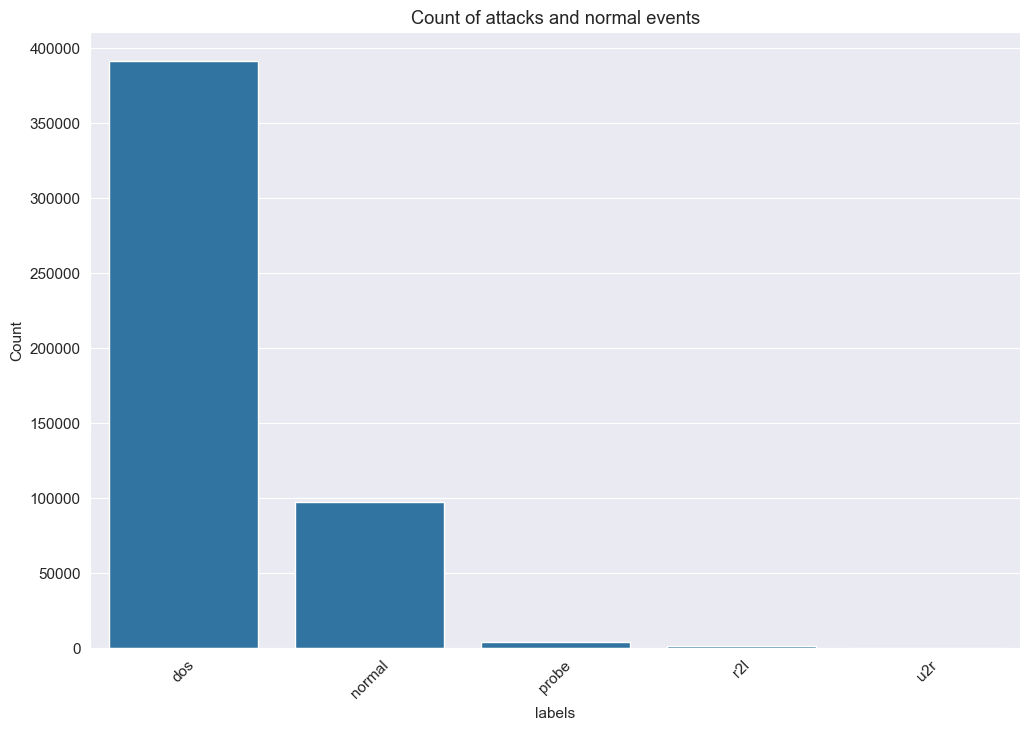

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12,8)

font = {"size" : 11}
plt.rc('font',**font)

grouped_label = data.groupby("labels")["labels"].count().sort_values(ascending=False)
plt.xticks(rotation=45)

sns.barplot(x=grouped_label.index, y=grouped_label.values)
plt.title("Count of attacks and normal events")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

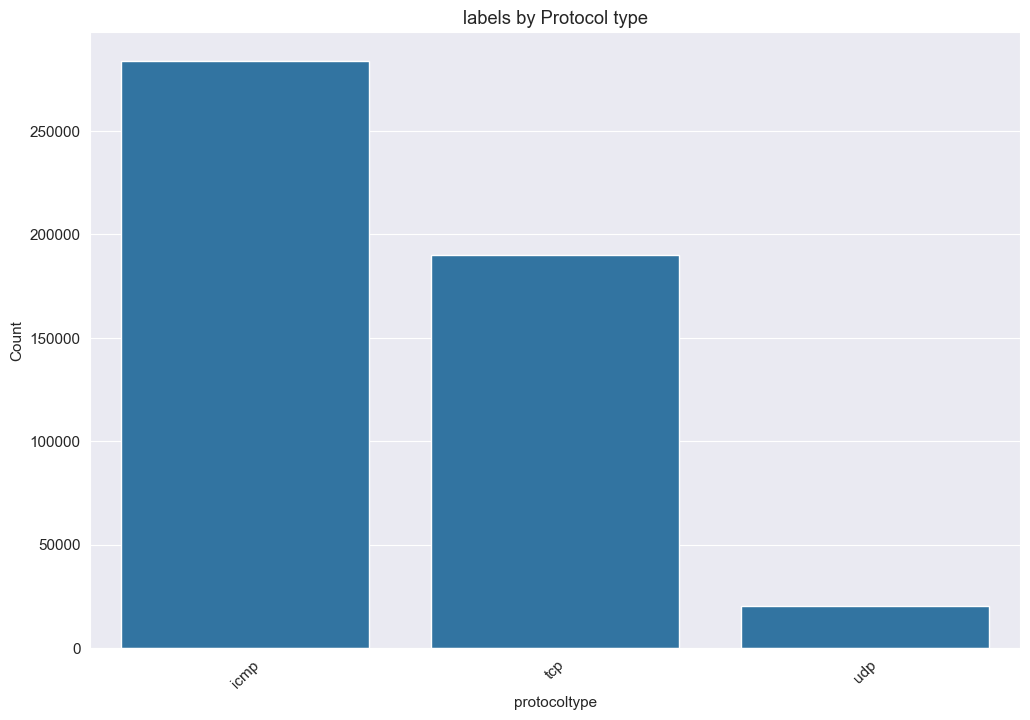

In [12]:
grouped_labels = data.groupby("protocoltype")["protocoltype"].count().sort_values(ascending=False)
plt.xticks(rotation=45)

sns.barplot(x=grouped_labels.index, y=grouped_labels.values)
plt.title("labels by Protocol type")
plt.ylabel("Count")

Text(0.5, 1.0, 'Class balance')

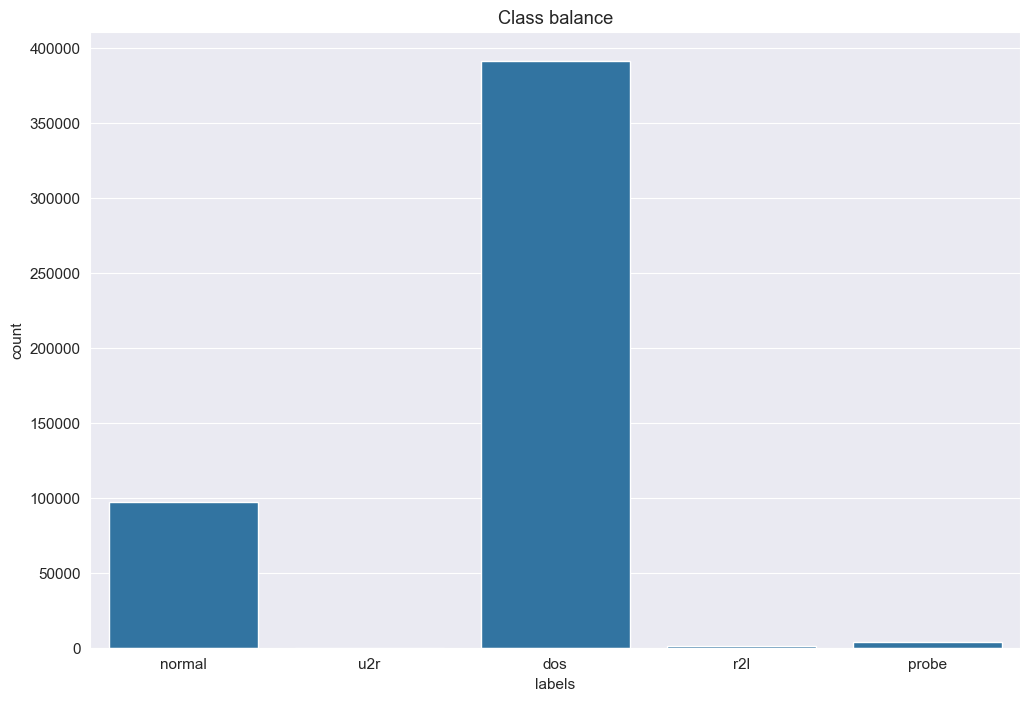

In [13]:
sns.countplot(x="labels", data=data)
plt.title("Class balance")

pengecekan korelasi atau populasi data

pengecekan korelasi data jenis serangan cyber pada setiap protocol berdasarkan count atau jumlah

/home/rikza/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Number of connections to the same host as the current connection in the past two seconds ')

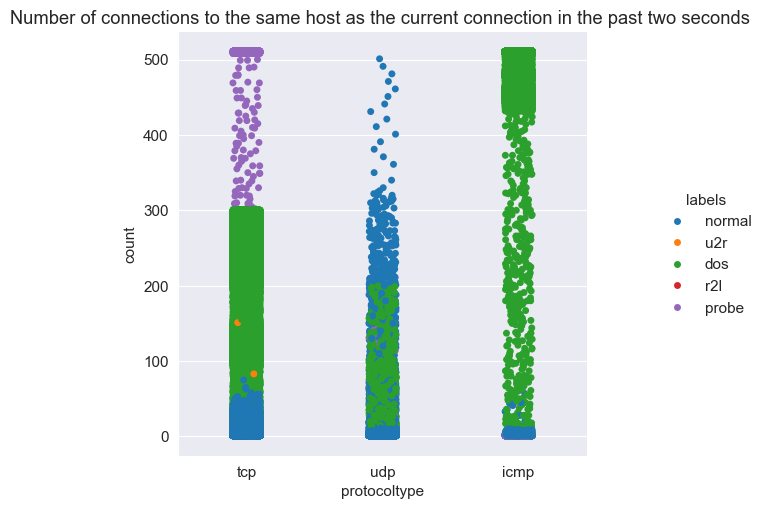

In [14]:
sns.catplot(x="protocoltype", y="count", hue="labels", data=data)
plt.title("Number of connections to the same host as the current connection in the past two seconds ")

pengecekan korelasi data pada jenis serangan cyber pada setiap protocol berdasarkan numfilecreations atau jumlah file yang dibuah

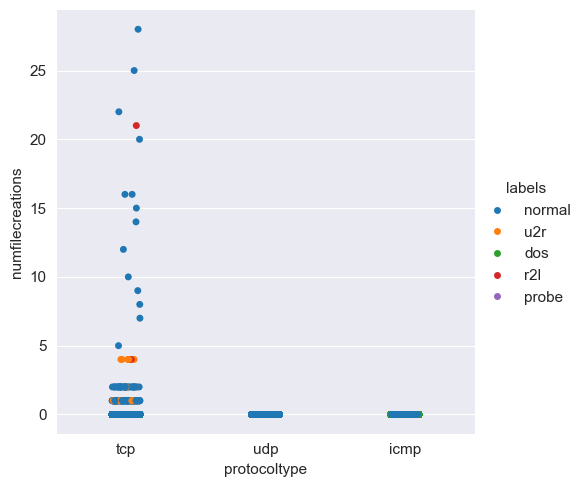

In [15]:
sns.catplot(x="protocoltype", y="numfilecreations", hue="labels", data=data)

pengecekan korelasi data jenis serangan cyber pada setiap protocol berdasarkan numfailedlogins atau jumlah kegagalan logins

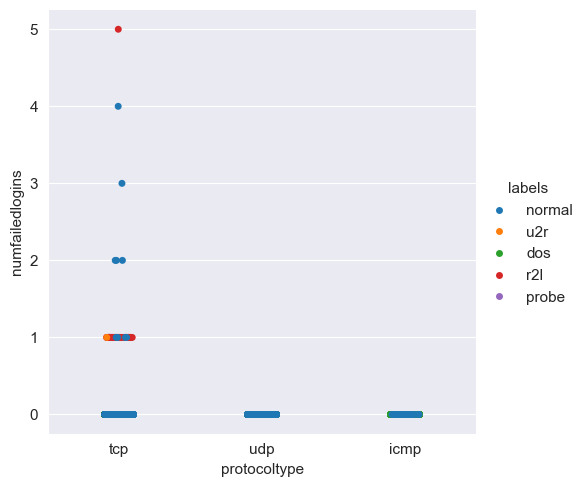

In [16]:
sns.catplot(x="protocoltype", y="numfailedlogins", hue="labels", data=data)

pengecekan korelasi data jenis serangan cyber pada setiap protocol berdasarkan numshell atau jumlah shell

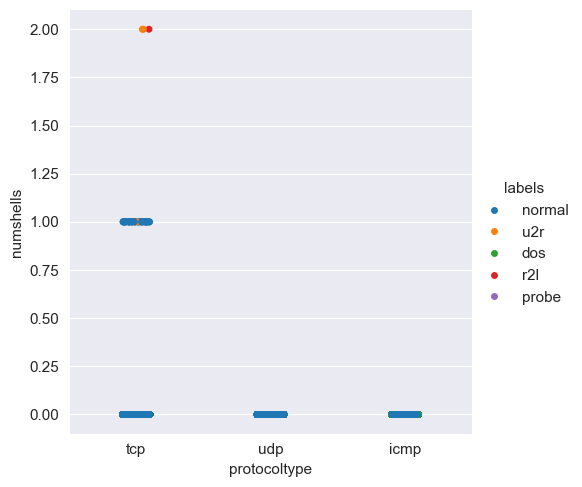

In [17]:
sns.catplot(x="protocoltype", y="numshells", hue="labels", data=data)

pengecekan korelasi data jenis serangan cyber pada setiap protocol berdasarkan numaccessfiles atau jumlah access file

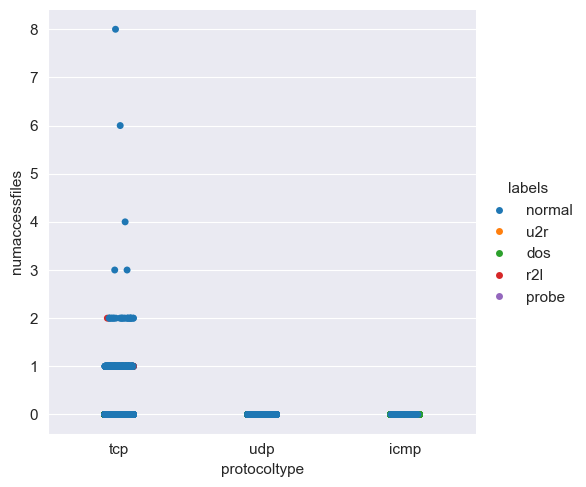

In [18]:
sns.catplot(x="protocoltype", y="numaccessfiles", hue="labels", data=data)

pengecekan korelasi dari jenis serangan cyber pada setiap protocol berdasarkan suattempted

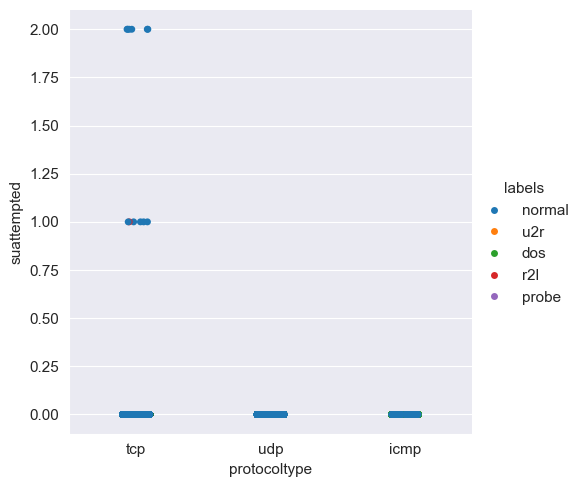

In [19]:
sns.catplot(x="protocoltype", y="suattempted", hue="labels", data=data)

pengecekan korelasi data jenins serangan cyber pada setiap protocol berdasarkan duration

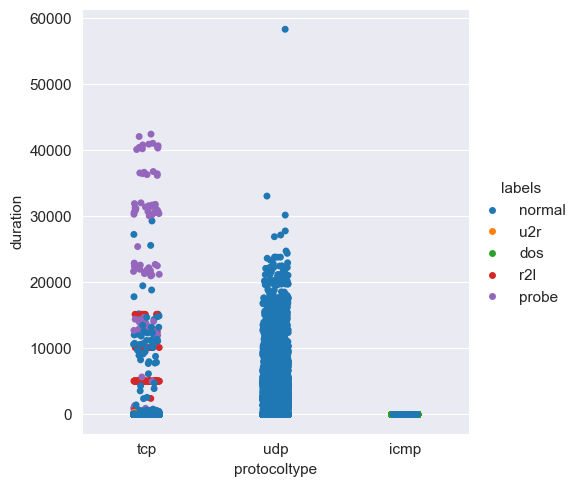

In [20]:
sns.catplot(x="protocoltype", y="duration", hue="labels", data=data)

pengecekan korelasi data jenis serangan cyber pada setiap protocol berdasarkan srcbytes atau source bytes

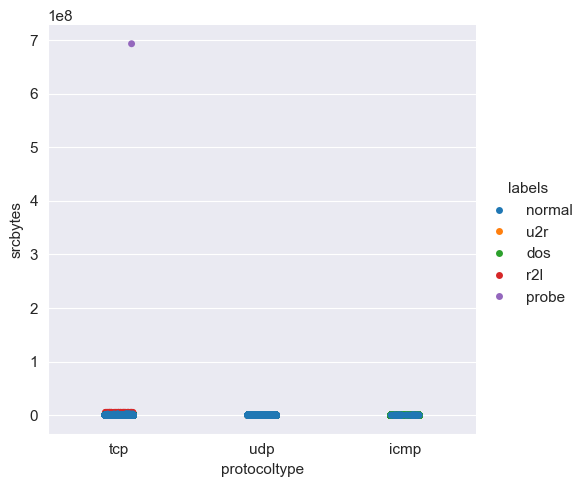

In [21]:
sns.catplot(x="protocoltype", y="srcbytes", hue="labels", data=data)

pengecekan korelasi data jenis serangan cyber pada setiap protocol berdasarkan dstbytes

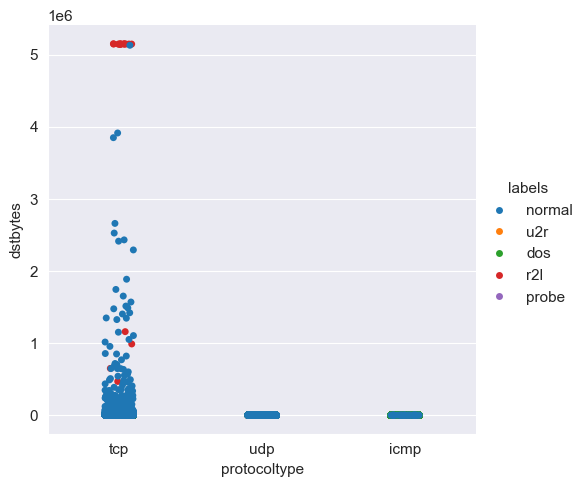

In [22]:
sns.catplot(x="protocoltype", y="dstbytes", hue="labels", data=data)

menentukan nilai x dan y

In [23]:
y = [0 if i == "normal" else 1 for i in data["labels"]]
# y = [1 if item == "normal" else
#      2 if item == "dos" else
#      3 if item == "u2r" else
#      4 if item == "r2l" else
#      5 if item == "probe" else
#      0  # Default value if none of the conditions are met
#      for item in data['labels']]


melihat nilai mean dari y

In [24]:
from statistics import mean
mean(y)

0.8030893423558918

menentukan nilai x dan melakukan splitting dataset

In [25]:
enc_protocol    = pd.get_dummies(data["protocoltype"], prefix="protocol_")
enc_service     = pd.get_dummies(data["service"], prefix="service_") 
enc_flag        = pd.get_dummies(data["flag"], prefix="flag_")

X = data.drop("labels",axis=1)
X = pd.concat([X, enc_protocol, enc_service, enc_flag], axis=1)

X.drop("protocoltype", axis=1, inplace=True)
X.drop("service", axis=1, inplace=True)
X.drop("flag", axis=1, inplace=True)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y)

In [43]:
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% ada pada test set".format((len(X_test)/len(data.index)) * 100))

80.00% ada pada training set
20.00% ada pada test set


In [65]:
print("Jumlah data dengan status normal : {0} data".format(y.count(0)))
print("Jumlah data dengan status serangan : {0} data".format(y.count(1)))
print("==================================")
print("Training True : {0} ({1:2.2f}%)".format(y_train.count(1), (y_train.count(1)/len(y_train) * 100.0)))
print("Training False : {0} ({1:2.2f}%)".format(y_train.count(0), (y_train.count(0)/len(y_train) * 100.0)))
print("==================================")
print("Testing True : {0} ({1:2.2f}%)".format(y_test.count(1), (y_test.count(1)/len(y_test) * 100.0)))
print("Testing False : {0} ({1:2.2f}%)".format(y_test.count(0), (y_test.count(0)/len(y_test) * 100.0)))


Jumlah data dengan status normal : 97278 data
Jumlah data dengan status serangan : 396743 data
Training True : 317394 (80.31%)
Training False : 77822 (19.69%)
Testing True : 79349 (80.31%)
Testing False : 19456 (19.69%)


pengaplikasian algoritma logistic regression dan random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# random forest
modelrf = RandomForestClassifier()
modelrf.fit(X_train,y_train)

y_rf = modelrf.predict(X_test)

# logistic regression
modellr = LogisticRegression()
modellr.fit(X_train,y_train)

y_lr = modellr.predict(X_test)

/home/rikza/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


evaluasi data menggunakan confusion matrix

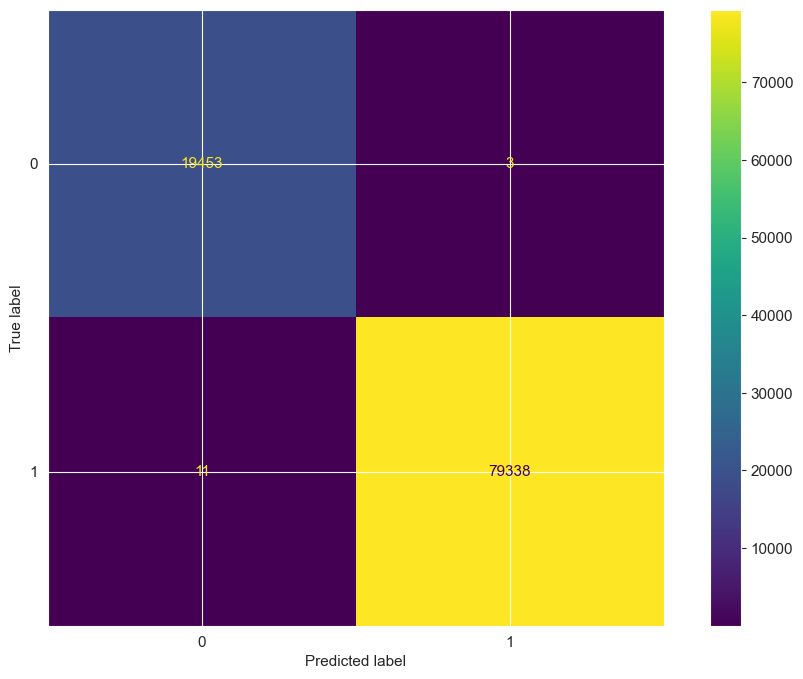

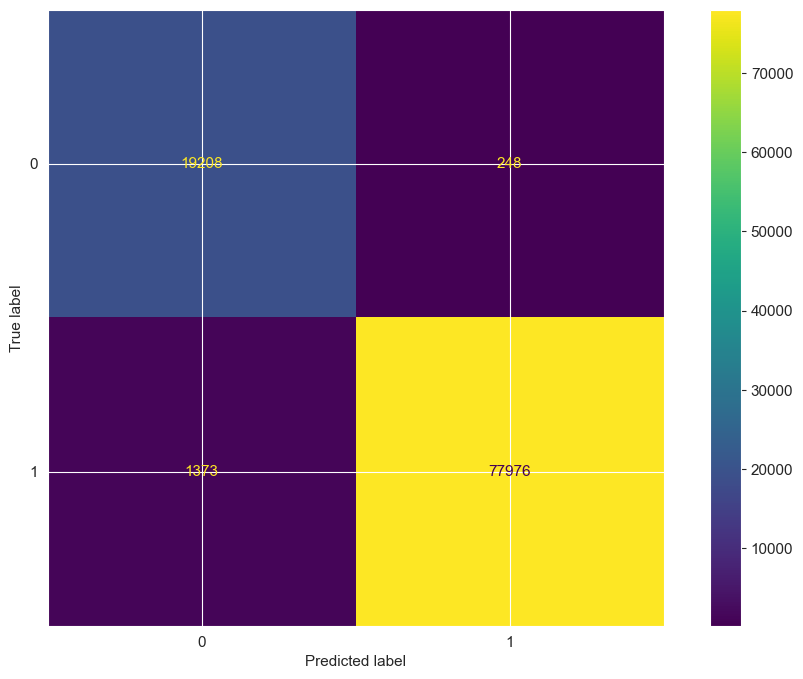

In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cmrf = confusion_matrix(y_test, y_rf)
disprf = ConfusionMatrixDisplay(confusion_matrix=cmrf)
disprf.plot()

cmlr = confusion_matrix(y_test, y_lr)
displr = ConfusionMatrixDisplay(confusion_matrix=cmlr)
displr.plot()

melihat detail data

In [31]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluasi performa model Random Forest
rf_accuracy = accuracy_score(y_test, y_rf)
rf_classification_report = classification_report(y_test, y_rf)

# Evaluasi performa model Logistic Regression
lr_accuracy = accuracy_score(y_test, y_lr)
lr_classification_report = classification_report(y_test, y_lr)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_classification_report)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", lr_classification_report)

Random Forest Accuracy: 0.999858306765852
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19456
           1       1.00      1.00      1.00     79349

    accuracy                           1.00     98805
   macro avg       1.00      1.00      1.00     98805
weighted avg       1.00      1.00      1.00     98805

Logistic Regression Accuracy: 0.9835939476747129
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     19456
           1       1.00      0.98      0.99     79349

    accuracy                           0.98     98805
   macro avg       0.97      0.98      0.97     98805
weighted avg       0.98      0.98      0.98     98805



visualisasi perbandingan accuracy data 

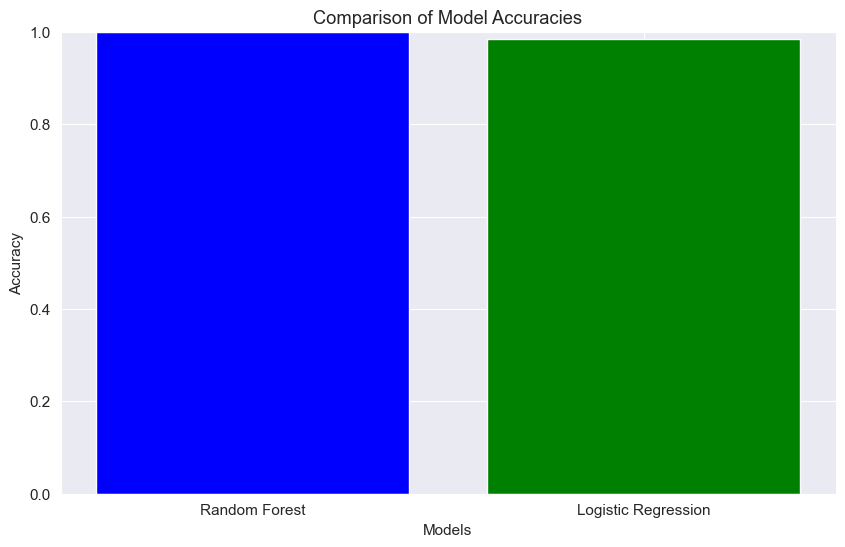

In [32]:
# Data untuk visualisasi
models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_accuracy, lr_accuracy]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.0, 1.0)  # Mengatur rentang sumbu y
plt.show()